In [ ]:
!pip -q install numpy pandas scikit-learn matplotlib joblib


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import joblib, json, os
from datetime import datetime
from google.colab import files


In [ ]:
uploaded = files.upload()
CSV = list(uploaded.keys())[0]
df = pd.read_csv(CSV)


Saving house_prices_large.csv to house_prices_large.csv


In [ ]:
rename_map = {}
for c in df.columns:
    lc = c.strip().lower()
    if lc in ('sqft','sq.ft','sq_feet','square_feet','size'): rename_map[c]='square_feet'
    if lc in ('bed','beds','bedroom','bedrooms'): rename_map[c]='bedrooms'
    if lc in ('bath','baths','bathroom','bathrooms'): rename_map[c]='bathrooms'
    if lc in ('price','saleprice','sale_price','target'): rename_map[c]='price'
if rename_map: df = df.rename(columns=rename_map)
print('columns:', list(df.columns))


columns: ['square_feet', 'bedrooms', 'bathrooms', 'price']


In [ ]:
required = ['square_feet','bedrooms','bathrooms','price']
missing = [c for c in required if c not in df.columns]
if missing:
    raise ValueError('Missing columns: ' + ', '.join(missing))


In [ ]:
data = df[required].copy()
data = data.dropna()
data = data[(data.square_feet>0) & (data.price>0) & (data.bedrooms>=0) & (data.bathrooms>=0)]
for col in required:
    low, high = data[col].quantile([0.01,0.99])
    data[col] = data[col].clip(lower=low, upper=high)
data = data.reset_index(drop=True)
print('rows after clean:', data.shape[0])


rows after clean: 500


In [ ]:
from sklearn.model_selection import train_test_split

X = df[['square_feet', 'bedrooms', 'bathrooms']]
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"R2: {r2:.4f}   MAE: {mae:.2f}   RMSE: {rmse:.2f}")


R2: 0.9940   MAE: 9815.90   RMSE: 11522.16


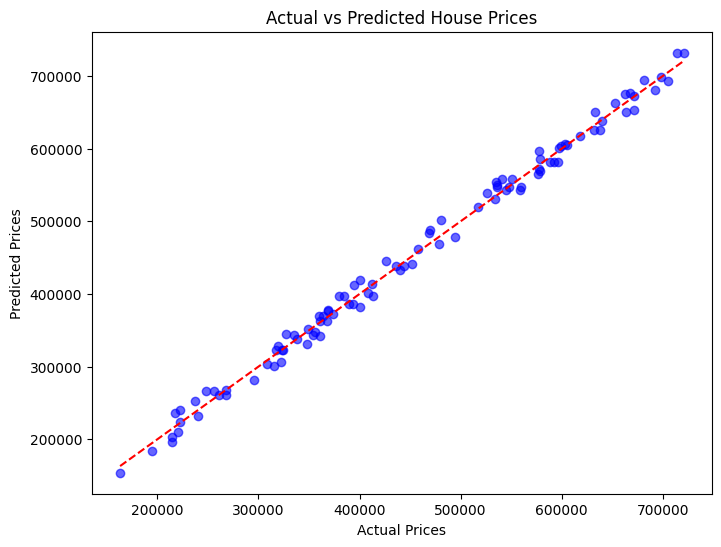

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.6, color="blue")
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # perfect fit line
plt.show()


In [ ]:
import joblib

joblib.dump(model, "linear_regression_house_price.joblib")
print("Model saved successfully!")


Model saved successfully!


In [ ]:
import json
import pandas as pd

metrics = {
    "R2": round(r2, 4),
    "MAE": round(mae, 2),
    "RMSE": round(rmse, 2)
}
with open("metrics.json", "w") as f:
    json.dump(metrics, f)

cleaned_data = pd.concat([X, y], axis=1)
cleaned_data.to_csv("cleaned_house_prices.csv", index=False)
print("Metrics and cleaned dataset saved!")


Metrics and cleaned dataset saved!


In [ ]:
report = f"""
# House Price Prediction - Linear Regression

## Model Performance
- R² Score: {r2:.4f}
- Mean Absolute Error (MAE): {mae:.2f}
- Root Mean Squared Error (RMSE): {rmse:.2f}

## Notes
- Features used: square footage, bedrooms, bathrooms
- Target: House Price
"""

with open("REPORT.md", "w") as f:
    f.write(report)

print("Report saved successfully!")


Report saved successfully!
